In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
from io import StringIO
from flask import Flask, render_template, request
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [39]:
app = Flask(__name__)

In [40]:
data = pd.read_csv('btcSentiment.csv')
data

,Unnamed: 0,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow,target
0,2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,6.000000,-0.303405,0.650209,424.440002,0
1,2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,5.933333,-0.319340,0.658542,394.795990,0
2,2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,5.933333,-0.319830,0.658542,408.903992,1
3,2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,5.766667,-0.324750,0.660923,398.821014,0
4,2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,5.800000,-0.295682,0.644257,435.790985,1
...,...,...,...,...,...,...,...,...,...,...,...
1627,2024-05-22 00:00:00+00:00,70135.320312,70623.695312,68977.695312,69122.335938,32802561717,2.833333,-0.364329,0.678439,68526.101562,0
1628,2024-05-24 00:00:00+00:00,67928.132812,69220.296875,66622.671875,68526.101562,29197308153,2.800000,-0.400286,0.695106,68518.093750,0
1629,2024-05-26 00:00:00+00:00,69264.289062,69506.226562,68183.890625,68518.093750,15628433737,2.800000,-0.466192,0.728439,66756.398438,0
1630,2024-06-13 00:00:00+00:00,68243.101562,68365.781250,66304.562500,66756.398438,28955204146,2.800000,-0.465617,0.728439,66490.296875,0


In [41]:
features = ['open', 'high', 'low', 'close', 'volume', 'edit_count', 'sentiment', 'neg_sentiment']
target = 'target'

X = data[features]
y = data[target]


In [42]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [44]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [45]:
y_pred = model.predict(X_test)

In [46]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')

Accuracy: 0.5259938837920489
Confusion Matrix:
[[ 70  89]
 [ 66 102]]


In [47]:
import pandas as pd

# Read the CSV file
data_from_btc = pd.read_csv("btc.csv")

# Get the last row
last_row_btc = data_from_btc.iloc[-1]

print("Last row from btc.csv:")
print(last_row_btc)

Last row from btc.csv:
Date            2024-06-18 00:00:00+00:00
Open                         66490.976562
High                         66491.226562
Low                          64118.074219
Close                        64688.902344
Volume                        38563229696
Dividends                             0.0
Stock Splits                          0.0
Name: 3562, dtype: object


In [48]:
import pandas as pd

# Read the CSV file
sentiment_from_btc = pd.read_csv("bitcoin_sentiment.csv")

# Get the last row
last_row_btc_sentiment = sentiment_from_btc.iloc[-1]

print("Last row from bitcoin_sentiment.csv:")
print(last_row_btc_sentiment)

Last row from bitcoin_sentiment.csv:
Unnamed: 0       2024-06-17
edit_count              2.7
sentiment         -0.417396
neg_sentiment      0.703439
Name: 2672, dtype: object


In [49]:
# Function to fetch the latest data
def fetch_latest_data():
    # This function should fetch the latest data from your real-time source
    latest_data = {
        "open": last_row_btc['Open'],
        "high": last_row_btc['High'],
        "low": last_row_btc['Low'],
        "close": last_row_btc['Close'],
        "volume": last_row_btc['Volume'],
        "edit_count": last_row_btc_sentiment['edit_count'],
        "sentiment": last_row_btc_sentiment['sentiment'],
        "neg_sentiment": last_row_btc_sentiment['neg_sentiment']
    }
    return latest_data


In [50]:
# Fetch and preprocess new data
latest_data = fetch_latest_data()
latest_df = pd.DataFrame([latest_data])
latest_df

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment
0,66490.976562,66491.226562,64118.074219,64688.902344,38563229696,2.7,-0.417396,0.703439


In [51]:
latest_probabilities = model.predict_proba(latest_df)

c:\Users\SUBRAT\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [52]:
import matplotlib.pyplot as plt
import numpy as np

# Define the function to plot probabilities
def plot_probabilities(probabilities):
    labels = ['Decrease', 'Increase']
    values = probabilities[0]

    fig, ax = plt.subplots()
    ax.barh(labels, values, color=['red', 'green'])
    ax.set_xlim(0, 1)
    ax.set_xlabel('Probability')
    ax.set_title('Probability of Bitcoin Price Change')

    for index, value in enumerate(values):
        ax.text(value, index, f'{value:.2f}', va='center')

    plt.show()

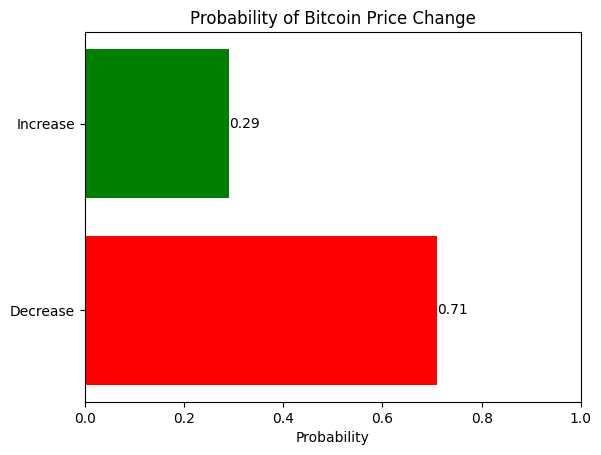

In [53]:
# Fetch the combined data
latest_data = fetch_latest_data()

# Create a DataFrame with the latest data
latest_df = pd.DataFrame([latest_data])

# Standardize the latest data
latest_X_scaled = scaler.transform(latest_df[features])

# Predict the probabilities
latest_probabilities = model.predict_proba(latest_X_scaled)

# Plot the probabilities
plot_probabilities(latest_probabilities)

In [54]:
print(f"Probability of price decrease: {latest_probabilities[0][0]:.2f}")
print(f"Probability of price increase: {latest_probabilities[0][1]:.2f}")

Probability of price decrease: 0.71
Probability of price increase: 0.29


In [ ]:
import pickle 
with open('btc_prob.pkl', 'wb') as f:
    pickle.dump(model, f)